In [87]:
import json
import pandas as pd
import networkx as nx
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from joblib import Parallel, delayed
import os
import multiprocessing
import seaborn as sns
#import graph_tool.all as gt


In [3]:

# Carregar dados JSON
with open('./MC3/mc3.json', 'r') as f:
    data = json.load(f)

In [22]:

# Converter dados para DataFrames
df_nodos = pd.DataFrame(data['nodes'])
df_links = pd.DataFrame(data['links'])

In [23]:
df_nodos[df_nodos['id'] == 'Acosta-Flores']

,type,country,ProductServices,PointOfContact,HeadOfOrg,founding_date,revenue,TradeDescription,_last_edited_by,_last_edited_date,_date_added,_raw_source,_algorithm,id,dob
14,Entity.Organization.FishingCompany,Mawalara,Fish and seafood products,Katrina Martinez,Alessio Romiti,1961-01-03T00:00:00,24766.67,Acosta-Flores is a leading provider of fresh a...,Pelagia Alethea Mordoch,2035-01-01T00:00:00,2035-01-01T00:00:00,Existing Corporate Structure Data,Automatic Import,Acosta-Flores,NaN


In [6]:
# Filtrar links de propriedade
#df_links_propriedade = df_links[df_links['type'] == 'Event.Owns.Shareholdership']

In [7]:
#df_links_propriedade[df_links_propriedade['source'] == 'Acosta-Flores']

,start_date,type,_last_edited_by,_last_edited_date,_date_added,_raw_source,_algorithm,source,target,key,end_date


In [24]:
# Criar grafo
G = nx.from_pandas_edgelist(df_links, 'source', 'target', edge_attr=True)

In [9]:
#missing_nodes = set(df_nodos['id']) - set(G.nodes)
#if missing_nodes:
#    print(f"IDs de nodos ausentes no grafo: {missing_nodes}")

IDs de nodos ausentes no grafo: {'Joseph Frederick', 'Virginia Myers', 'Edwin Reilly', 'Mark Ellison', 'Matthew Steele', 'Steven Willis', 'Michael Mccoy', 'Danielle Pierce', 'Reginald Moore', 'Mark Hart', 'Rachel Simmons', 'Hayes, Martin and Rodriguez', 'Nancy Santos', 'Kyle Riddle MD', 'Brian Robertson', 'Flores, Johnson and Alexander', 'Victor Hoffman', 'Larry Brown', 'Rickey Barrera', 'Stephanie Harding', 'Miguel Bradford', 'Donald Johnson', 'Mrs. Katherine Acevedo', 'Katie Blanchard', 'Manuel Kane', 'Wendy Duarte', 'Kenneth Maldonado', 'Ralph Thompson', 'Michael Brewer', 'Tony Hughes', 'Soukupová Horváthová s.r.o.', 'Lisa Mooney', 'Diane King', 'Ricardo Young', 'John Jenkins', 'Joseph-Vincent Breton', 'Donald Pena', 'Sabrina Sharp', 'Paul Dickerson', 'Bill Chen', 'Sara Green', 'Dostál Fišerová a.s.', 'Alexandria Gutierrez', 'Maria Tyler', 'Smith, Jones and Jacobson', 'Joseph Gentry', 'Jessica Hopkins', 'Jack Myers', 'Victor Johnston', 'Phillips and Sons', 'Flores, Shaw and Barker',

In [25]:
# Adicionar atributos aos nodos
for index, row in df_nodos.iterrows():
    if row['id'] in G.nodes:
        G.nodes[row['id']].update(row.to_dict())

In [11]:
# Visualização inicial do grafo
#pos = nx.spring_layout(G)
#nx.draw(G, pos, with_labels=True, node_size=50, font_size=8)
#plt.show()

In [26]:
# Função para calcular o layout em paralelo
def calculate_layout_parallel(graph, num_chunks):
    nodes = list(graph.nodes())
    chunks = [nodes[i::num_chunks] for i in range(num_chunks)]
    
    def spring_layout_chunk(chunk):
        subgraph = graph.subgraph(chunk)
        return nx.spring_layout(subgraph)
    
    layout_parts = Parallel(n_jobs=num_chunks)(
        delayed(spring_layout_chunk)(chunk) for chunk in chunks
    )
    
    pos = {}
    for part in layout_parts:
        pos.update(part)
    
    return pos

In [29]:
num_cores = multiprocessing.cpu_count()
num_cores = int(num_cores * 0.8)

In [ ]:
# Calcular o layout usando processamento paralelo
pos = calculate_layout_parallel(G, num_cores)


In [ ]:
# Desenhar o grafo
nx.draw(G, pos, with_labels=True, node_size=50, font_size=8)
plt.show()

In [48]:
southseafood_node = df_nodos[df_nodos['id'] == 'SouthSeafood Express Corp']
southseafood_node

,type,country,ProductServices,PointOfContact,HeadOfOrg,founding_date,revenue,TradeDescription,_last_edited_by,_last_edited_date,_date_added,_raw_source,_algorithm,id,dob
60463,Entity.Organization.FishingCompany,Oceanus,Fishing and other related activities,Luce du Adam,Achille Forza,2032-11-05T00:00:00,6529.36,Offering comprehensive fishing solutions and r...,Pelagia Alethea Mordoch,2035-01-01T00:00:00,2035-01-01T00:00:00,Existing Corporate Structure Data,Automatic Import,SouthSeafood Express Corp,NaN


In [50]:
southseafood_events = df_links[(df_links['source'] == 'SouthSeafood Express Corp') | (df_links['target'] == 'SouthSeafood Express Corp')]
southseafood_events

,start_date,type,_last_edited_by,_last_edited_date,_date_added,_raw_source,_algorithm,source,target,key,end_date,year
75663,2033-10-29,Event.Owns.Shareholdership,Pelagia Alethea Mordoch,2035-01-01T00:00:00,2035-01-01T00:00:00,Existing Corporate Structure Data,Automatic Import,AguaLeska Transit N.V.,SouthSeafood Express Corp,0,2035-05-25T00:00:00,2033.0
75699,2035-05-25,Event.Owns.Shareholdership,Niklaus Oberon,2035-06-15T00:00:00,2035-06-15T00:00:00,Oceanus Corporations Monthly - May '35,Manual Entry,Tainamarine Fishing Co,SouthSeafood Express Corp,0,NaN,2035.0


Os analistas da FishEye querem visualizar melhor as mudanças nas estruturas corporativas ao longo do tempo. Crie uma abordagem de análise visual que os analistas possam usar para destacar padrões temporais e mudanças nas estruturas corporativas. Examine as pessoas e empresas mais ativas usando análise visual.

Visualização Temporal das Estruturas Corporativas
Para visualizar as mudanças nas estruturas corporativas ao longo do tempo, vamos criar uma visualização interativa:

In [54]:
df_links['type'].unique()

array(['Event.Owns.Shareholdership', 'Event.Owns.BeneficialOwnership',
       'Event.WorksFor', 'Relationship.FamilyRelationship'], dtype=object)

In [43]:
# Adicionar coluna de ano para facilitar a análise temporal
def convert_to_date(date_str):
    try:
        return pd.to_datetime(date_str, format="%Y-%m-%d").date()
    except ValueError:
        return pd.to_datetime(date_str).date()
    
df_links['start_date'] = df_links['start_date'].apply(convert_to_date)
df_links['year'] = pd.to_datetime(df_links['start_date']).dt.year


# Contagem de relações por ano
relations_per_year = df_links.groupby(['year', 'type']).size().reset_index(name='counts')

# Criação da visualização temporal
fig = px.bar(relations_per_year, x='year', y='counts', color='type', title='Mudanças nas Estruturas Corporativas ao Longo do Tempo')
fig.show()

Exemplos de Transações Comerciais Típicas e Atípicas
Para identificar e visualizar transações típicas e atípicas, vamos criar gráficos que mostrem a distribuição dos tipos de transações:

In [44]:
# Exemplo de transações típicas e atípicas
transaction_counts = df_links['type'].value_counts().reset_index()
transaction_counts.columns = ['TransactionType', 'Counts']

# Gráfico de pizza para mostrar a distribuição dos tipos de transações
fig = px.pie(transaction_counts, values='Counts', names='TransactionType', title='Distribuição dos Tipos de Transações')
fig.show()


Inferências de Influência ao Longo do Tempo
Para inferir a influência de uma empresa ao longo do tempo, utilizaremos métricas de centralidade:

In [45]:
# Calcular centralidade ao longo do tempo
centrality = nx.degree_centrality(G)

# Converter para DataFrame para visualização
df_centrality = pd.DataFrame.from_dict(centrality, orient='index', columns=['Centrality'])
df_centrality.reset_index(inplace=True)
df_centrality.columns = ['Node', 'Centrality']

# Visualização da centralidade
fig = px.histogram(df_centrality, x='Centrality', title='Distribuição da Centralidade das Empresas')
fig.show()


Rede Associada à SouthSeafood Express Corp e Impactos
Identificar a rede associada à SouthSeafood Express Corp e visualizar mudanças após o comportamento ilegal:

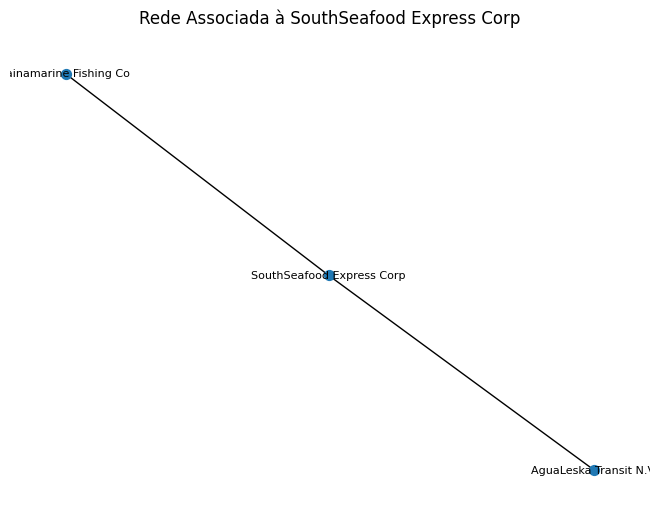

In [46]:
# Filtrar as arestas e nós relacionados à SouthSeafood Express Corp
ssc_network = df_links[(df_links['source'] == 'SouthSeafood Express Corp') | (df_links['target'] == 'SouthSeafood Express Corp')]

# Criar subgrafo
ssc_subgraph = G.subgraph(ssc_network['source'].tolist() + ssc_network['target'].tolist())

# Visualização do subgrafo
pos = nx.kamada_kawai_layout(ssc_subgraph)
nx.draw(ssc_subgraph, pos, with_labels=True, node_size=50, font_size=8)
plt.title('Rede Associada à SouthSeafood Express Corp')
plt.show()


#refazendo primeiro item    

Os analistas da FishEye querem visualizar melhor as mudanças nas estruturas corporativas ao longo do tempo. Crie uma abordagem de análise visual que os analistas possam usar para destacar padrões temporais e mudanças nas estruturas corporativas. Examine as pessoas e empresas mais ativas usando análise visual.

Visualização Temporal das Estruturas Corporativas
Para visualizar as mudanças nas estruturas corporativas ao longo do tempo, vamos criar uma visualização interativa:

In [76]:
df_links_property = df_links[df_links['type'] == 'Event.Owns.Shareholdership']
df_links_beneficial = df_links[df_links['type'] == 'Event.Owns.BeneficialOwnership']

In [77]:
# Criar um grafo direcionado para relações de propriedade
G_property = nx.DiGraph()
for _, row in df_links_property.iterrows():
    G_property.add_edge(row['source'], row['target'], start_date=row['start_date'], end_date=row['end_date'])

# Criar um grafo direcionado para relações de benefício econômico
G_beneficial = nx.DiGraph()
for _, row in df_links_beneficial.iterrows():
    G_beneficial.add_edge(row['source'], row['target'], start_date=row['start_date'], end_date=row['end_date'])


In [78]:
df_links_property = df_links[df_links['type'] == 'Event.Owns.Shareholdership']
df_links_beneficial = df_links[df_links['type'] == 'Event.Owns.BeneficialOwnership']

In [ ]:
# Função para plotar grafo com base nas datas
def plot_temporal_graph(G, title):
    plt.figure(figsize=(12, 8))
    pos = nx.spring_layout(G)
    edges = G.edges(data=True)
    for u, v, data in edges:
        plt.plot([data['start_date'], data['end_date']], [pos[u][1], pos[v][1]], linewidth=2, alpha=0.7)
    nx.draw_networkx_nodes(G, pos, node_size=3000, node_color='lightblue')
    nx.draw_networkx_labels(G, pos, font_size=10, font_weight='bold')
    plt.title(title)
    plt.xlabel('Tempo')
    plt.ylabel('Empresas')
    plt.grid(True)
    plt.show()

# Plotar evolução temporal das relações de propriedade
plot_temporal_graph(G_property, 'Evolução Temporal das Relações de Propriedade')


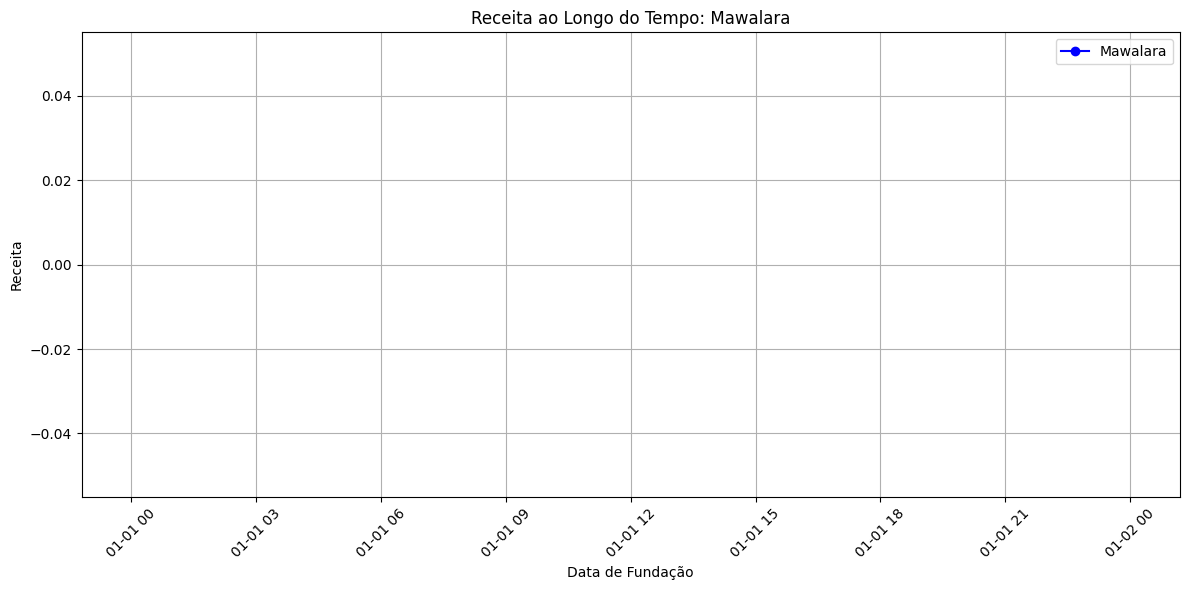

In [82]:
# Converter coluna de data para tipo datetime
df_nodos['founding_date'] = pd.to_datetime(df_nodos['founding_date'])

# Exemplo de gráfico de linha temporal de receita de uma empresa específica
empresa = 'Mawalara'  # Exemplo de uma empresa específica
df_empresa = df_nodos[df_nodos['id'] == empresa].sort_values(by='founding_date')

plt.figure(figsize=(12, 6))
plt.plot(df_empresa['founding_date'], df_empresa['revenue'], marker='o', linestyle='-', color='b', label=empresa)
plt.title('Receita ao Longo do Tempo: ' + empresa)
plt.xlabel('Data de Fundação')
plt.ylabel('Receita')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# Converter coluna de data para tipo datetime
df_links_property['start_date'] = pd.to_datetime(df_links_property['start_date'])

# Agrupar por ano e contar o número de transações de propriedade
df_links_property['year'] = df_links_property['start_date'].dt.year
df_links_property['month'] = df_links_property['start_date'].dt.month

heatmap_data = df_links_property.groupby(['year', 'month']).size().unstack(fill_value=0)

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt='g', cbar_kws={'label': 'Número de Transações'})
plt.title('Heatmap de Transações de Propriedade ao Longo do Tempo')
plt.xlabel('Mês')
plt.ylabel('Ano')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [233]:
df_links['start_date'] = pd.to_datetime(df_links['start_date'])

#Filtrar os tipos de relação desejados
df_links_shareholdership = df_links[df_links['type'] == 'Event.Owns.Shareholdership']
df_links_beneficialownership = df_links[df_links['type'] == 'Event.Owns.BeneficialOwnership']
df_links_worksfor = df_links[df_links['type'] == 'Event.WorksFor']
df_links_familyrelationship = df_links[df_links['type'] == 'Relationship.FamilyRelationship']

# Criar uma função para calcular a quantidade de empresas únicas por source e ano
def count_unique_targets(df):
    return df.groupby(['source', df['start_date'].dt.year])['target'].nunique().reset_index(name='count')

def count_unique_sources(df):
    return df.groupby(['target', df['start_date'].dt.year])['source'].nunique().reset_index(name='count')

# Aplicar a função para cada tipo de relação
count_shareholdership = count_unique_targets(df_links_shareholdership)
count_beneficialownership = count_unique_targets(df_links_beneficialownership)
count_works = count_unique_sources(df_links_worksfor)
count_familyrelationship = count_unique_targets(df_links_familyrelationship)

In [156]:
max_shareholder_year = count_shareholdership.groupby('start_date')['count'].max().reset_index()
max_beneficialownership_year = count_beneficialownership.groupby('start_date')['count'].max().reset_index()
max_count_worksfor_year = count_works.groupby('start_date')['count'].max().reset_index()
count_familyrelationship

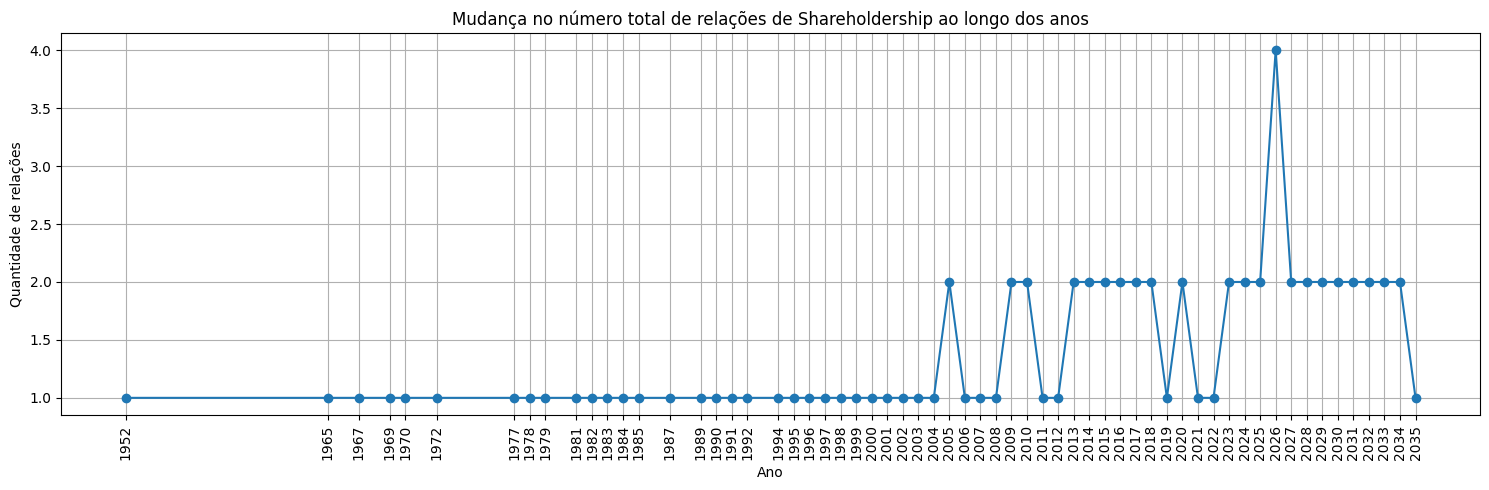

In [152]:
# Plotar o gráfico de linhas
plt.figure(figsize=(15, 5))
plt.plot(max_shareholder_year['start_date'], max_shareholder_year['count'], marker='o')
plt.title('Mudança no número total de relações de Shareholdership ao longo dos anos')
plt.xlabel('Ano')
plt.ylabel('Quantidade de relações')
plt.xticks(rotation=90)
plt.xticks(max_shareholder_year['start_date'])
plt.grid(True)
plt.tight_layout()
plt.show()

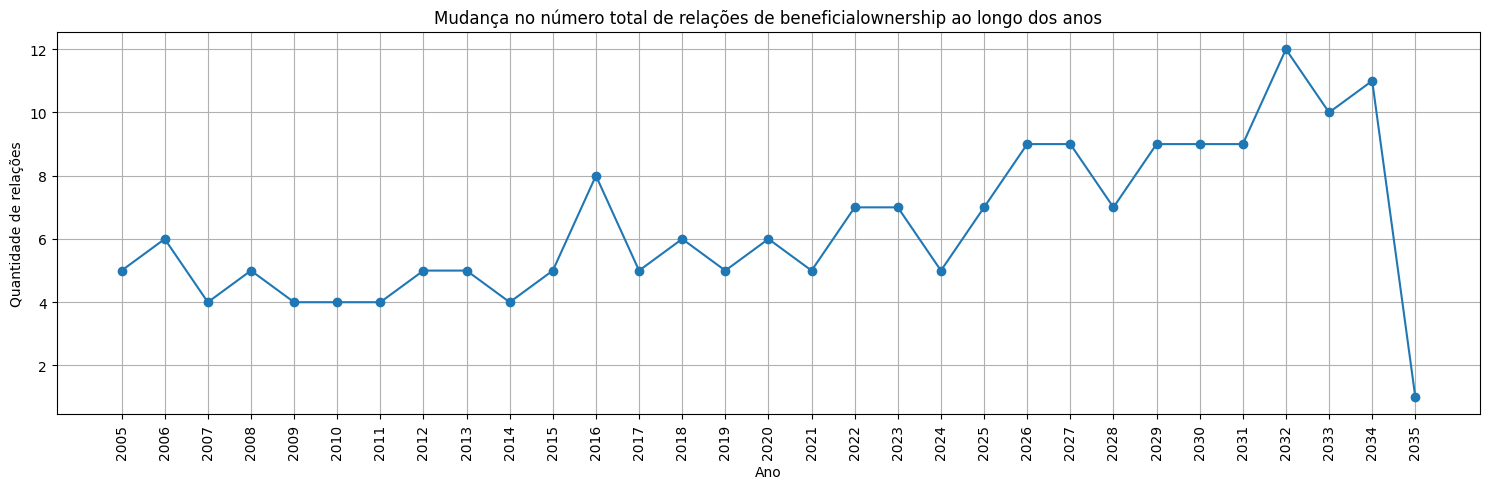

In [158]:
# Plotar o gráfico de linhas
plt.figure(figsize=(15, 5))
plt.plot(max_beneficialownership_year['start_date'], max_beneficialownership_year['count'], marker='o')
plt.title('Mudança no número total de relações de beneficialownership ao longo dos anos')
plt.xlabel('Ano')
plt.ylabel('Quantidade de relações')
plt.xticks(rotation=90)
plt.xticks(max_beneficialownership_year['start_date'])
plt.grid(True)
plt.tight_layout()
plt.show()

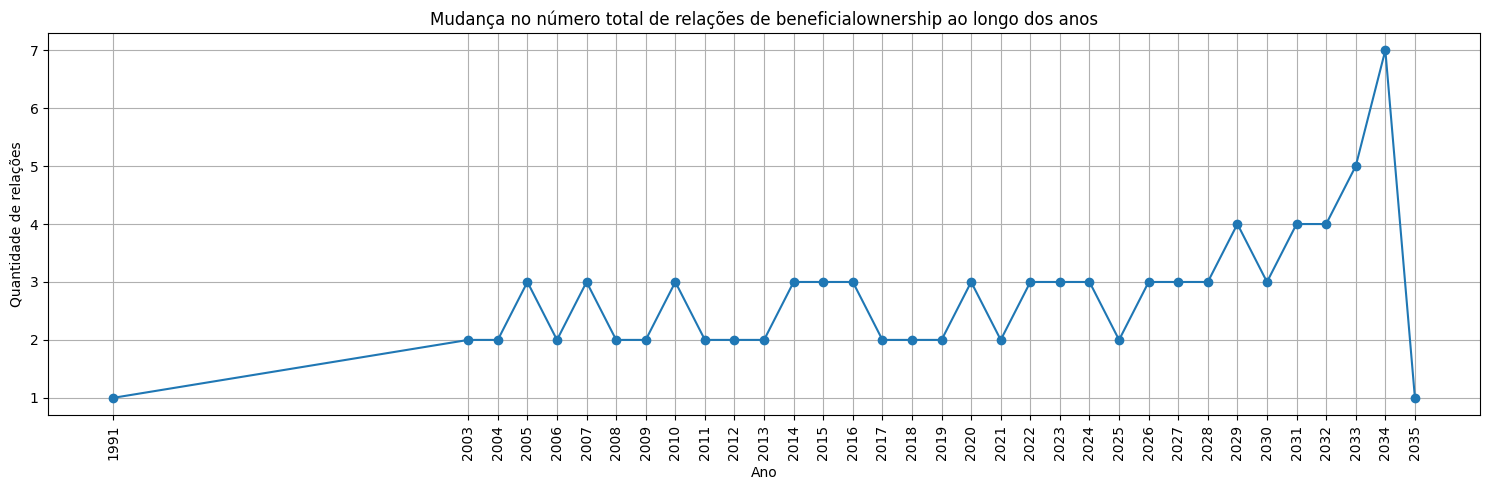

In [188]:
# Plotar o gráfico de linhas
plt.figure(figsize=(15, 5))
plt.plot(max_count_worksfor_year['start_date'], max_count_worksfor_year['count'], marker='o')
plt.title('Mudança no número total de relações de beneficialownership ao longo dos anos')
plt.xlabel('Ano')
plt.ylabel('Quantidade de relações')
plt.xticks(rotation=90)
plt.xticks(max_count_worksfor_year['start_date'])
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(years, familyrelationship_counts, marker='o', linestyle='-', color='purple', label='Family Relationship')
plt.title('Quantidade de Family Relationship ao Longo dos Anos')
plt.xlabel('Ano')
plt.ylabel('Número de Relações')
plt.xticks(years)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


* Event.Owns.Shareholdership (Propriedade/Acionistas):

Esta relação indica que uma entidade (por exemplo, uma empresa) possui participação acionária em outra entidade. É útil para entender a estrutura de propriedade e as conexões acionárias entre empresas.

* Event.Owns.BeneficialOwnership (Propriedade Beneficiária):

Este tipo de relação se refere à propriedade beneficiária, que é diferente da propriedade legal direta. Indica que uma entidade possui benefício econômico de uma propriedade, mesmo que não seja o proprietário legal registrado. É comumente usado para identificar quem realmente se beneficia das ações ou propriedades de uma empresa, especialmente em estruturas complexas de propriedade.

* Event.WorksFor (Trabalha Para):

Esta relação indica que uma pessoa ou entidade trabalha para outra. Por exemplo, um funcionário trabalha para uma empresa. É útil para entender a estrutura organizacional e as relações de emprego dentro das entidades.

* Relationship.FamilyRelationship (Relacionamento Familiar):

Este tipo de relação indica um relacionamento familiar entre entidades. Pode ser usado para identificar conexões familiares dentro de empresas ou entre entidades, o que pode influenciar decisões empresariais e estratégias.